In [26]:
# Importer les bibliothèques
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Chargement des données 
Dans le dataset "Bases de données annuelles des accidents corporels de la circulation routière", nous retrouvons ces tables:\
* lieux : les endroits exacts où les acciddent ont eu lieu
* vehicule : les véhicule des personnes accidentées
* caracteristiques : 


In [18]:
# Charger les données usagers
data_fn_2021 = {
    'lieux':'lieux-2021.csv', 
    'vehicules':'vehicules-2021.csv',
    'carcteristiques':'carcteristiques-2021.csv',
    'usagers':'usagers-2021.csv'
}

data_fn_2022 = {
    'lieux':'lieux-2022.csv', 
    'vehicules':'vehicules-2022.csv',
    'carcteristiques':'carcteristiques-2022.csv',
    'usagers':'usagers-2022.csv'
}

base_fpath = './data/2021' 
usagers_fpath = os.path.join(base_fpath, data_fn_2021['usagers'])
print('{}'.format(usagers_fpath))


df = pd.read_csv(usagers_fpath, sep=';')  # Attention à l'encodage et au séparateur


# Aperçu des données
df.head()

./data/2021/usagers-2021.csv


,Num_Acc,id_usager,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,202100000001,267 638,201 764,B01,1,1,3,1,2000.0,1,0,9,-1,0,0,-1
1,202100000001,267 639,201 765,A01,1,1,1,1,1978.0,1,1,-1,-1,0,0,-1
2,202100000002,267 636,201 762,A01,1,1,4,1,1983.0,0,1,-1,-1,0,0,-1
3,202100000002,267 637,201 763,B01,1,1,3,1,1993.0,0,1,-1,-1,0,0,-1
4,202100000003,267 634,201 761,A01,1,1,1,1,1995.0,1,1,0,-1,0,0,-1


In [19]:
# Information sur les colonnes et les types de données
print("##########################################################")
print("## Information sur les colonnes et les types de données ##")
print("##########################################################\n")
print(df.info())


# Description statistique
print("\n#############################")
print("## Description Statistique ##")
print("#############################\n")
print(df.describe())


# Affichage des colonnes
print("\n############################")
print("## Affichage des colonnes ##")
print("############################\n")
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129248 entries, 0 to 129247
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Num_Acc      129248 non-null  int64  
 1   id_usager    129248 non-null  object 
 2   id_vehicule  129248 non-null  object 
 3   num_veh      129248 non-null  object 
 4   place        129248 non-null  int64  
 5   catu         129248 non-null  int64  
 6   grav         129248 non-null  int64  
 7   sexe         129248 non-null  int64  
 8   an_nais      126181 non-null  float64
 9   trajet       129248 non-null  int64  
 10  secu1        129248 non-null  int64  
 11  secu2        129248 non-null  int64  
 12  secu3        129248 non-null  int64  
 13  locp         129248 non-null  int64  
 14  actp         129248 non-null  object 
 15  etatp        129248 non-null  int64  
dtypes: float64(1), int64(11), object(4)
memory usage: 15.8+ MB


Index(['Num_Acc', 'id_usager', 'id_vehicule', 'num_veh', 'place', 'catu',
       'grav', 'sexe', 'an_nais', 'trajet', 'secu1', 'secu2', 'secu3', 'locp',
       'actp', 'etatp'],
      dtype='object')

In [20]:
# Vérification des valeurs manquantes
df.isnull().sum()

# Suppression des lignes ou colonnes avec des valeurs manquantes (optionnel)
df.dropna(inplace=True)

In [21]:
# Sélection de colonnes "pertinentes" et exclures d'autres 

exclud_var = ['id_usager', 'id_vehicule', 'num_veh', 'actp']
df.columns.to_list()
target_var = 'grav'
X = df[[col for col in df.columns.to_list() if col != target_var and not col in exclud_var]]


# Gravité de l'accident est notre variable cible
y = df[target_var]
y

0         3
1         1
2         4
3         3
4         1
         ..
129243    4
129244    4
129245    3
129246    3
129247    3
Name: grav, Length: 126181, dtype: int64

In [22]:
# Encodage des variables catégorielles avec pandas
X_encoded = pd.get_dummies(X, drop_first=True)

# Vérification du jeu de données encodé
X_encoded.head()

,Num_Acc,place,catu,sexe,an_nais,trajet,secu1,secu2,secu3,locp,etatp
0,202100000001,1,1,1,2000.0,1,0,9,-1,0,-1
1,202100000001,1,1,1,1978.0,1,1,-1,-1,0,-1
2,202100000002,1,1,1,1983.0,0,1,-1,-1,0,-1
3,202100000002,1,1,1,1993.0,0,1,-1,-1,0,-1
4,202100000003,1,1,1,1995.0,1,1,0,-1,0,-1


### Classeur
On veut désormais voir comment se débrouille un classeur de type RandomForest venant de sklearn.
Donc à partir de train_test_split, on crée un dataset de train et un dataset de test.\
On doit varier une variable à la fois quand on voudra continuer le projet cet aprèm.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Modèle RandomForest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           1       0.59      0.68      0.63     15604
           2       0.11      0.06      0.08       966
           3       0.36      0.27      0.31      5736
           4       0.54      0.53      0.53     15549

    accuracy                           0.54     37855
   macro avg       0.40      0.38      0.39     37855
weighted avg       0.52      0.54      0.53     37855

Accuracy: 0.5382380134724607


              precision    recall  f1-score   support

           1       0.59      0.68      0.63     15604
           2       0.11      0.06      0.08       966
           3       0.36      0.27      0.31      5736
           4       0.54      0.53      0.53     15549

    accuracy                           0.54     37855
   macro avg       0.40      0.38      0.39     37855
weighted avg       0.52      0.54      0.53     37855



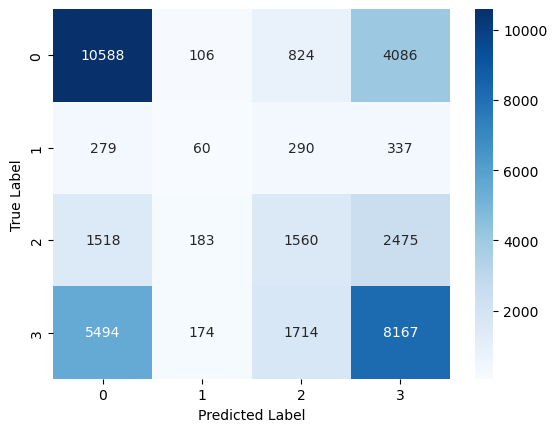

In [27]:
# Affichage du rapport de classification
print(classification_report(y_test, y_pred))

# Matrice de confusion pour visualiser les performances du modèle
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualisation de la matrice de confusion
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [98]:
# Importer les bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
from time import perf_counter
pd.__version__

'2.2.2'

In [26]:
data = pd.read_pickle("./data/2022/merged-data-2022.pkl")

data

,Num_Acc,place,catu,grav,sexe,age,trajet,secu1,secu2,secu3,...,jour,mois,hrmn,lum,dep,com,agg,int,atm,col
0,202200000001,1,1,3,1,14,5,2,8,-1,...,19,10,81,1,24,2590,2,3,1,3
1,202200000001,1,1,1,1,74,5,1,8,-1,...,19,10,81,1,24,2590,2,3,1,3
2,202200000002,1,1,4,1,34,9,1,0,-1,...,20,10,42,1,23,2446,2,3,1,3
3,202200000002,1,1,1,1,52,4,1,0,-1,...,20,10,42,1,23,2446,2,3,1,3
4,202200000003,1,1,1,1,20,0,1,0,-1,...,20,10,86,1,20,2217,2,6,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126657,202200055301,1,1,1,2,20,5,1,-1,-1,...,1,1,43,1,81,9900,1,3,1,3
126658,202200055301,8,2,3,2,18,5,1,-1,-1,...,1,1,43,1,81,9900,1,3,1,3
126659,202200055301,1,1,4,2,69,5,1,-1,-1,...,1,1,43,1,81,9900,1,3,1,3
126660,202200055302,1,1,3,1,30,1,2,6,-1,...,1,3,84,1,41,4679,2,1,1,2


In [84]:
X = data.drop('grav', axis=1)
X

,place,catu,sexe,age,trajet,secu1,secu2,secu3,locp,actp,...,jour,mois,hrmn,lum,dep,com,agg,int,atm,col
0,1,1,1,14,5,2,8,-1,-1,-1,...,19,10,81,1,24,2590,2,3,1,3
1,1,1,1,74,5,1,8,-1,-1,-1,...,19,10,81,1,24,2590,2,3,1,3
2,1,1,1,34,9,1,0,-1,0,0,...,20,10,42,1,23,2446,2,3,1,3
3,1,1,1,52,4,1,0,-1,0,0,...,20,10,42,1,23,2446,2,3,1,3
4,1,1,1,20,0,1,0,-1,-1,-1,...,20,10,86,1,20,2217,2,6,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126657,1,1,2,20,5,1,-1,-1,0,0,...,1,1,43,1,81,9900,1,3,1,3
126658,8,2,2,18,5,1,-1,-1,0,0,...,1,1,43,1,81,9900,1,3,1,3
126659,1,1,2,69,5,1,-1,-1,0,0,...,1,1,43,1,81,9900,1,3,1,3
126660,1,1,1,30,1,2,6,-1,-1,-1,...,1,3,84,1,41,4679,2,1,1,2


In [28]:
y = data["grav"]
y

0         3
1         1
2         4
3         1
4         1
         ..
126657    1
126658    3
126659    4
126660    3
126661    1
Name: grav, Length: 126662, dtype: int8

In [74]:
# Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [75]:
# Modèle RandomForest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [76]:
# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

          -1       0.93      0.19      0.32        67
           1       0.73      0.84      0.78     16121
           2       0.42      0.06      0.10      1032
           3       0.53      0.41      0.46      5809
           4       0.66      0.65      0.66     14970

    accuracy                           0.68     37999
   macro avg       0.65      0.43      0.46     37999
weighted avg       0.66      0.68      0.66     37999

Accuracy: 0.6788336535171978


In [85]:
pca = PCA()
xp = pca.fit_transform(X)

In [48]:
xp

array([[-4.41399606e+03, -4.63186113e+01, -3.10603658e+00, ...,
         2.07606021e-01,  1.62393292e-02, -1.30336479e-01],
       [-4.41401162e+03, -4.61393192e+01, -3.18620535e+00, ...,
         2.01409325e-01,  3.00211180e-02, -3.39920640e-02],
       [-4.55800515e+03, -4.66587980e+01, -3.99372027e+00, ...,
         3.44135397e-01, -1.02030290e-01, -2.53615386e-02],
       ...,
       [ 2.89618212e+03, -2.63994676e+01,  2.59280122e+01, ...,
        -5.04796347e-01, -1.01050420e-01, -1.00544500e-01],
       [-2.32606316e+03,  3.59776649e+02,  2.86188260e+01, ...,
         5.42401366e-01,  1.12738368e-02, -6.81949188e-02],
       [-2.32606531e+03,  3.59806502e+02,  2.88333352e+01, ...,
         6.26862446e-01, -9.35888325e-03, -1.18106250e-01]])

In [90]:
print(X.shape)
print(pca.explained_variance_ratio_) 
print(pca.explained_variance_[0]/pca.explained_variance_.sum())
print(pca.explained_variance_)
print(pca.components_)
print(xp.shape)
print(y.shape)
print(xp[:, 0].reshape(-1, 1).shape)
print(xp[:, :1].shape)

(126662, 39)
[9.98108200e-01 1.64911150e-03 1.15449133e-04 6.23202362e-05
 3.11326417e-05 1.51938294e-05 6.12579882e-06 5.05995420e-06
 9.36209468e-07 8.98911900e-07 8.35369428e-07 6.35250770e-07
 5.83867678e-07 4.53289432e-07 4.21252532e-07 3.91878239e-07
 3.17535522e-07 2.68749849e-07 2.31376212e-07 2.21329472e-07
 1.79153543e-07 1.70475554e-07 1.49731516e-07 1.04364560e-07
 8.76282925e-08 7.97144813e-08 7.17632691e-08 5.99801210e-08
 5.41209231e-08 5.21860359e-08 4.78841753e-08 3.57290201e-08
 3.26060533e-08 2.37366272e-08 2.07294087e-08 2.03694158e-08
 1.12032343e-08 5.55898769e-09 5.34379235e-09]
0.9981081996046506
[1.23912350e+07 2.04732594e+04 1.43326879e+03 7.73688353e+02
 3.86503065e+02 1.88627154e+02 7.60500841e+01 6.28179203e+01
 1.16227795e+01 1.11597406e+01 1.03708785e+01 7.88646115e+00
 7.24855440e+00 5.62746188e+00 5.22973271e+00 4.86505906e+00
 3.94211496e+00 3.33645443e+00 2.87247115e+00 2.74774368e+00
 2.22414128e+00 2.11640646e+00 1.85887501e+00 1.29565691e+00
 1.087

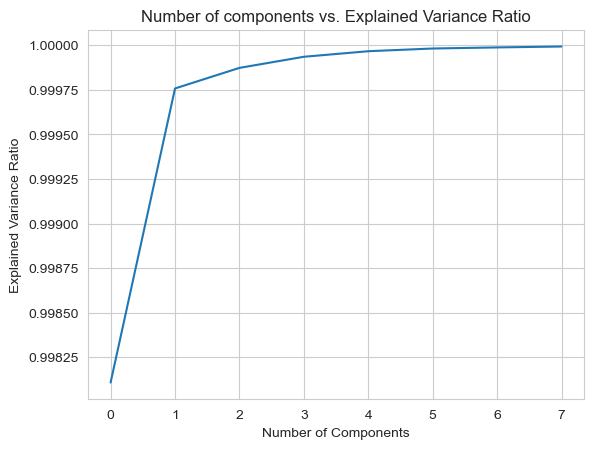

[0.9981081996046506, 0.9997573111076894, 0.9998727602402525, 0.9999350804764188, 0.9999662131181152, 0.9999814069474664, 0.9999875327462888, 0.999992592700486, 0.9999935289099545, 0.9999944278218541, 0.9999952631912817, 0.9999958984420514, 0.9999964823097297, 0.9999969355991615, 0.9999973568516934, 0.9999977487299326, 0.9999980662654551, 0.9999983350153043, 0.9999985663915162, 0.9999987877209887, 0.9999989668745317, 0.9999991373500857, 0.9999992870816016, 0.999999391446162, 0.9999994790744545, 0.9999995587889359, 0.999999630552205, 0.999999690532326, 0.999999744653249, 0.999999796839285, 0.9999998447234603, 0.9999998804524804, 0.9999999130585338, 0.999999936795161, 0.9999999575245697, 0.9999999778939855, 0.9999999890972199, 0.9999999946562076, 0.9999999999999999]


In [128]:
truc = [e for e in pca.explained_variance_ratio_]
for i in range(1, len(truc)):
    truc[i] += truc[i-1]
plt.plot(truc[:8])
plt.title("Number of components vs. Explained Variance Ratio")
plt.ylabel("Explained Variance Ratio")
plt.xlabel("Number of Components")
plt.show()
print(truc)

In [94]:
# Division des données
xp_train, xp_test, y_train, y_test = train_test_split(xp[:, :2], y, test_size=0.3, random_state=42)

In [95]:
# Modèle RandomForest
model = RandomForestClassifier(random_state=42)
model.fit(xp_train, y_train)

RandomForestClassifier(random_state=42)

In [97]:
# Prédictions sur l'ensemble de test
y_pred = model.predict(xp_test)

# Évaluation du modèle
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.43511671359772625


In [99]:
start = perf_counter()
truc = []
for i in range(1, 30):
    xp_train, xp_test, y_train, y_test = train_test_split(xp[:, :i], y, test_size=0.3, random_state=42)
    model = RandomForestClassifier(random_state=42)
    model.fit(xp_train, y_train)
    y_pred = model.predict(xp_test)
    truc.append(accuracy_score(y_test, y_pred))
end = perf_counter()
duration = end - start

print(f"It took {duration:.2f} seconds to run this motherfucker")
print(truc)

It took 2252.90 seconds to run this motherfucker
[0.40824758546277534, 0.43511671359772625, 0.4532487697044659, 0.49459196294639335, 0.5249085502250059, 0.581041606358062, 0.5838048369693939, 0.5908313376667808, 0.631937682570594, 0.6354904076423064, 0.6373325613831943, 0.6397010447643359, 0.6402536908866023, 0.6447538093107713, 0.6439379983683781, 0.6454906708071265, 0.6434379852101371, 0.6450432906129109, 0.6477275717782047, 0.6479117871522935, 0.6467538619437354, 0.6501486881233717, 0.6508066001736887, 0.6499381562672701, 0.6544645911734519, 0.6570699228927077, 0.6577015184610121, 0.6547277559935788, 0.6541487933892998]


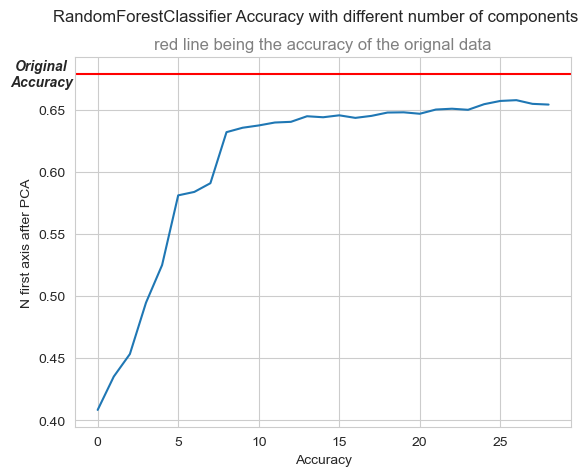

In [189]:
truc = [0.40824758546277534, 0.43511671359772625, 0.4532487697044659, 0.49459196294639335, 0.5249085502250059, 0.581041606358062, 0.5838048369693939, 0.5908313376667808, 0.631937682570594, 0.6354904076423064, 0.6373325613831943, 0.6397010447643359, 0.6402536908866023, 0.6447538093107713, 0.6439379983683781, 0.6454906708071265, 0.6434379852101371, 0.6450432906129109, 0.6477275717782047, 0.6479117871522935, 0.6467538619437354, 0.6501486881233717, 0.6508066001736887, 0.6499381562672701, 0.6544645911734519, 0.6570699228927077, 0.6577015184610121, 0.6547277559935788, 0.6541487933892998]
plt.plot(truc)
plt.suptitle(f"{RandomForestClassifier.__name__} Accuracy with different number of components")
plt.title("red line being the accuracy of the orignal data", color='grey')
plt.ylabel("N first axis after PCA")
plt.xlabel("Accuracy")
plt.text(-3.5, 0.6788336535171978, "Original\nAccuracy", horizontalalignment='center', verticalalignment='center', weight='bold', style="italic")
plt.axhline(0.6788336535171978, color='r')
plt.show()

In [190]:
import PcaOnData
from importlib import reload # This library is used to reload python script that have been modified after a first import in the notebook.
reload(PcaOnData)

data = pd.read_pickle("./data/2022/merged-data-2022.pkl")
X = data.drop('grav', axis=1).drop('Num_Acc', axis=1)
y = data["grav"]

my_PCA = PcaOnData.PcaOnData(X, y)

In [191]:

print(f"Original Accuracy: {my_PCA.original_accuracy}")

Original Accuracy: 0.6792547172294008


[0.9981081996046506, 0.9997573111076894, 0.9998727602402525, 0.9999350804764188, 0.9999662131181152, 0.9999814069474664, 0.9999875327462888, 0.999992592700486, 0.9999935289099545, 0.9999944278218541, 0.9999952631912817, 0.9999958984420514, 0.9999964823097297, 0.9999969355991615, 0.9999973568516934, 0.9999977487299326, 0.9999980662654551, 0.9999983350153043, 0.9999985663915162, 0.9999987877209887, 0.9999989668745317, 0.9999991373500857, 0.9999992870816016, 0.999999391446162, 0.9999994790744545, 0.9999995587889359, 0.999999630552205, 0.999999690532326, 0.999999744653249, 0.999999796839285, 0.9999998447234603, 0.9999998804524804, 0.9999999130585338, 0.999999936795161, 0.9999999575245697, 0.9999999778939855, 0.9999999890972199, 0.9999999946562076, 0.9999999999999999]


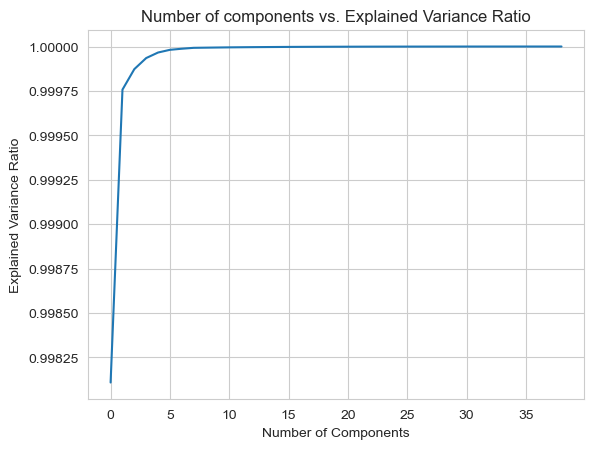

In [192]:
print(my_PCA.component_vs_variance())

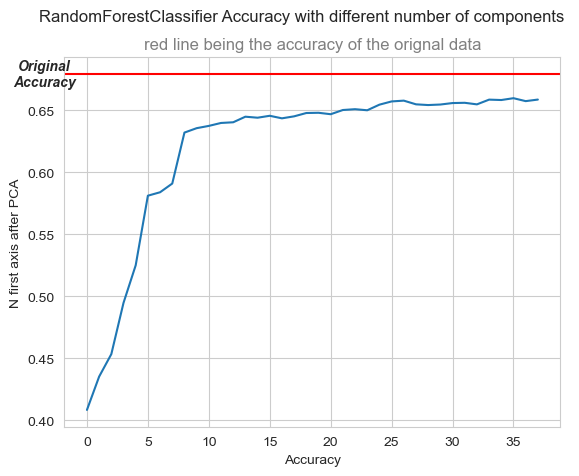

[0.40824758546277534, 0.43511671359772625, 0.4532487697044659, 0.49459196294639335, 0.5249085502250059, 0.581041606358062, 0.5838048369693939, 0.5908313376667808, 0.631937682570594, 0.6354904076423064, 0.6373325613831943, 0.6397010447643359, 0.6402536908866023, 0.6447538093107713, 0.6439379983683781, 0.6454906708071265, 0.6434379852101371, 0.6450432906129109, 0.6477275717782047, 0.6479117871522935, 0.6467538619437354, 0.6501486881233717, 0.6508066001736887, 0.6499381562672701, 0.6544645911734519, 0.6570699228927077, 0.6577015184610121, 0.6547277559935788, 0.6541487933892998, 0.6545698571015026, 0.6557540987920735, 0.655964630648175, 0.6547014395115661, 0.6585173294034053, 0.6582015316192531, 0.6596752546119635, 0.6573067712308218, 0.6585699623674307]


In [193]:
print(my_PCA.component_vs_accuracy())